# Telecom Customer Churn
written by: Adnan Siddiqui\
Date: 08.11.2024\
Email: asiddiqui50@gmail.com

Importing Libraries

In [1]:
import pandas as pd
import  numpy as np
import  matplotlib.pyplot as plt
import  seaborn as sns

Importing My File

In [3]:
df= pd.read_csv('telecom_customer_churn.csv')
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


Importing My 2nd Population File

In [5]:
df_population= pd.read_csv('telecom_zipcode_population.csv')
df_population.head()

,Zip Code,Population
0,90001,54492
1,90002,44586
2,90003,58198
3,90004,67852
4,90005,43019


Merging My Two Files Based On 'Zip Code' & 'Population'

In [7]:
df_merged = df.merge(df_population, on="Zip Code", how="left")
df_merged.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Population
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,4498
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,31297
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,62069
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,46677
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,42853


In [15]:
df_merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [16]:
df_merged.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Population
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056,22139.603294
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542,21152.392837
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000,11.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000,2344.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000,17554.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,36125.000000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,105285.000000


In [21]:
df_merged.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Number of Referrals,Tenure in Months,Offer,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Population
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,2,9,NaN,...,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,4498
1,0003-MKNFE,Male,46,No,0,Glendale,91206,0,9,NaN,...,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,31297
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,0,4,Offer E,...,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,62069
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,1,13,Offer D,...,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,46677
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,3,3,NaN,...,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,42853


# Finding Duplicated Rows In The Customer ID

In [22]:
df_merged['Customer ID'].duplicated

<bound method Series.duplicated of 0       0002-ORFBO
1       0003-MKNFE
2       0004-TLHLJ
3       0011-IGKFF
4       0013-EXCHZ
           ...    
7038    9987-LUTYD
7039    9992-RRAMN
7040    9992-UJOEL
7041    9993-LHIEB
7042    9995-HOTOH
Name: Customer ID, Length: 7043, dtype: object>

In [64]:
df_merged['Customer ID'].duplicated().sum()

np.int64(0)

Dropping Duplicated Rows From The Customer ID Column

In [23]:
df_merged.drop_duplicates(subset='Customer ID', keep='first', inplace=True)

In [24]:
df_merged.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Number of Referrals,Tenure in Months,Offer,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Population
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,2,9,NaN,...,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,4498
1,0003-MKNFE,Male,46,No,0,Glendale,91206,0,9,NaN,...,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,31297
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,0,4,Offer E,...,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,62069
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,1,13,Offer D,...,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,46677
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,3,3,NaN,...,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,42853


# Replacing Nan With '0' 

In [28]:
df_merged['Avg Monthly Long Distance Charges'].fillna(0, inplace=True)

C:\Users\TS\AppData\Local\Temp\ipykernel_8936\3830022436.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['Avg Monthly Long Distance Charges'].fillna(0, inplace=True)


In [29]:
df_merged['Avg Monthly Long Distance Charges'].head(37)

0     42.39
1     10.69
2     33.65
3     27.82
4      7.38
5     16.77
6      9.96
7     12.96
8     10.53
9     28.46
10     0.00
11    16.01
12    18.65
13     2.25
14     0.00
15    27.26
16     0.00
17     7.77
18    10.67
19     0.00
20    31.43
21    43.56
22    34.91
23     3.12
24    12.43
25     0.00
26    35.04
27    19.70
28    37.70
29    38.39
30    43.01
31    49.58
32    43.77
33    23.12
34     0.00
35    30.64
36     5.08
Name: Avg Monthly Long Distance Charges, dtype: float64

# Finding Nan Value

In [44]:
df_merged.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                    

# Finding Percentage of NaN  Values in a DataFrame

In [61]:
df_merged.isnull().sum()/len(df_merged)*100

Customer ID                          0.0
Gender                               0.0
Age                                  0.0
Married                              0.0
Number of Dependents                 0.0
City                                 0.0
Zip Code                             0.0
Number of Referrals                  0.0
Tenure in Months                     0.0
Offer                                0.0
Phone Service                        0.0
Avg Monthly Long Distance Charges    0.0
Multiple Lines                       0.0
Internet Service                     0.0
Internet Type                        0.0
Avg Monthly GB Download              0.0
Online Security                      0.0
Online Backup                        0.0
Device Protection Plan               0.0
Premium Tech Support                 0.0
Streaming TV                         0.0
Streaming Movies                     0.0
Streaming Music                      0.0
Unlimited Data                       0.0
Contract        

In [60]:
#df_merged['Churn Reason'] = df_merged['Churn Reason'].fillna('Customer Active')
df_merged['Offer'] = df_merged['Offer'].fillna('No Offer Accepted')

In [62]:
df_merged.head(10)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Number of Referrals,Tenure in Months,Offer,...,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Population,Online Backup
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,2,9,No Offer Accepted,...,593.30,0.00,0,381.51,974.81,Stayed,Customer Active,Customer Active,4498,Yes
1,0003-MKNFE,Male,46,No,0,Glendale,91206,0,9,No Offer Accepted,...,542.40,38.33,10,96.21,610.28,Stayed,Customer Active,Customer Active,31297,No
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,0,4,Offer E,...,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,62069,No
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,1,13,Offer D,...,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,46677,Yes
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,3,3,No Offer Accepted,...,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,42853,No
5,0013-MHZWF,Female,23,No,3,Midpines,95345,0,9,Offer E,...,571.45,0.00,0,150.93,722.38,Stayed,Customer Active,Customer Active,433,No
6,0013-SMEOE,Female,67,Yes,0,Lompoc,93437,1,71,Offer A,...,7904.25,0.00,0,707.16,8611.41,Stayed,Customer Active,Customer Active,6165,Yes
7,0014-BMAQU,Male,52,Yes,0,Napa,94558,8,63,Offer B,...,5377.80,0.00,20,816.48,6214.28,Stayed,Customer Active,Customer Active,63947,No
8,0015-UOCOJ,Female,68,No,0,Simi Valley,93063,0,7,Offer E,...,340.35,0.00,0,73.71,414.06,Stayed,Customer Active,Customer Active,49027,No
9,0016-QLJIS,Female,43,Yes,1,Sheridan,95681,3,65,No Offer Accepted,...,5957.90,0.00,0,1849.90,7807.80,Stayed,Customer Active,Customer Active,1219,Yes


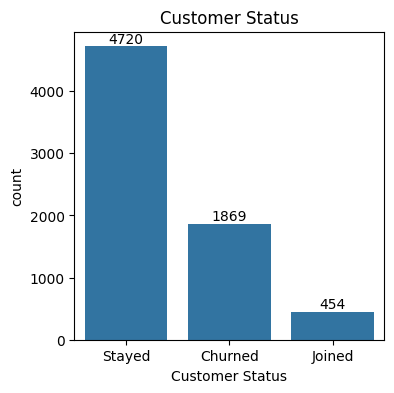

In [69]:
plt.figure(figsize=(4,4))
ax= sns.countplot(data=df_merged, x='Customer Status')
ax.bar_label(ax.containers[0])
plt.title('Customer Status')
plt.show()

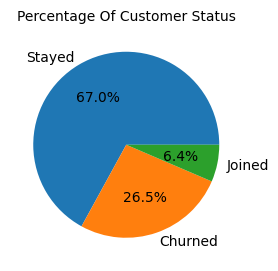

In [81]:
plt.figure(figsize=(3,4))
gb = df_merged['Customer Status'].value_counts()
plt.pie(gb.values, labels=gb.index, autopct='%1.1f%%')
plt.title('Percentage Of Customer Status', fontsize= 10)
plt.show()

From the above pie chart, we can conclude the following:
1. 67.0% of the customer stayed with the company
2. 6.4% of new customer joined the company
3. 26.5% of the customer left or (Churned) the company

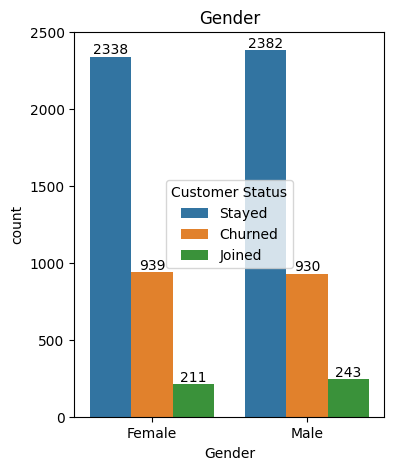

In [120]:
plt.figure(figsize=(4,5))
ax= sns.countplot(data=df_merged, x='Gender', hue= 'Customer Status')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Gender')
plt.show()

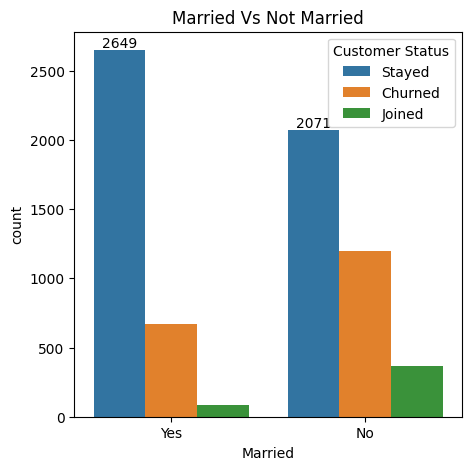

In [90]:
plt.figure(figsize=(5,5))
ax= sns.countplot(data=df_merged, x='Married', hue= 'Customer Status')
ax.bar_label(ax.containers[0])
plt.title('Married Vs Not Married')

plt.show()

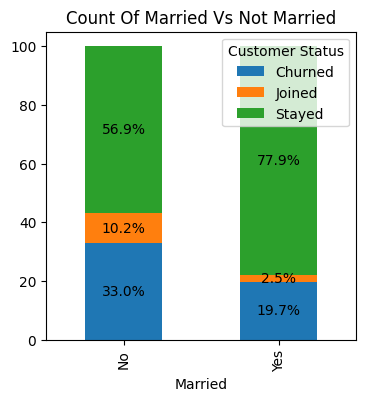

In [93]:
# Sample DataFrame, replace this with your actual DataFrame
# df_merged = pd.DataFrame({'Married': [...], 'Customer Status': [...]})

# Calculate the total count per category
total_counts = df_merged.groupby(['Married', 'Customer Status']).size().unstack(fill_value=0)

# Calculate the percentage for each category
percentage_counts = total_counts.div(total_counts.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(4,4))

# Plot the stacked bar chart
percentage_counts.plot(kind='bar', stacked=True, ax=ax)

# Add labels as percentages
for container in ax.containers:
    ax.bar_label(container, label_type='center', labels=[f'{x:.1f}%' for x in container.datavalues])

# Set the title
plt.title('Count Of Married Vs Not Married')

# Show the plot
plt.show()

From the above stack chart we can conclude the following for both Married/Not Married:
1. Not Married:\
   a. 56.9% of the customer stayed with the telecom operator\
   b. 33.0%  of the customer churned to another telecom operator\
   c. 10.2% of the new customer joined the operator 

2.  Married:\
   a. 77.9% of the customer stayed with the telecom operator\
   b. 19.7% of the customer churned to another telecom operator\
   c. 2.5%  of the new customer joined the operator 








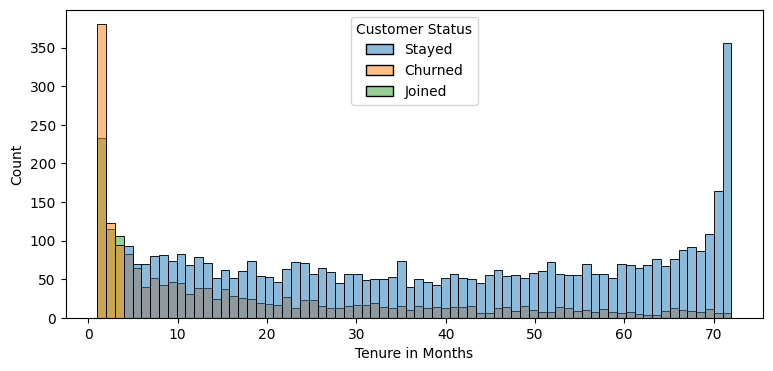

In [102]:
plt.figure(figsize=(9,4))
sns.histplot(data=df_merged, x='Tenure in Months', bins= 72, hue= 'Customer Status')
plt.show()

From the above chart, we see the churned customers leave the operator in the early months & all other customers stay with the operator due to good offer given.

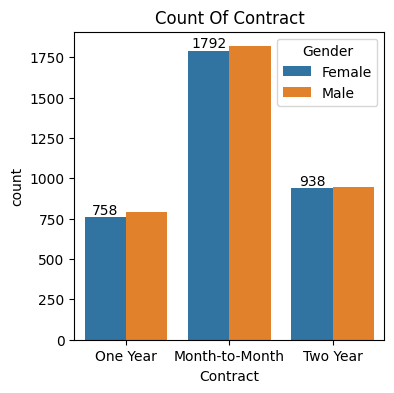

In [104]:
plt.figure(figsize=(4,4))
ax= sns.countplot(data=df_merged, x='Contract', hue= 'Gender')
ax.bar_label(ax.containers[0])
plt.title('Count Of Contract')
plt.show()

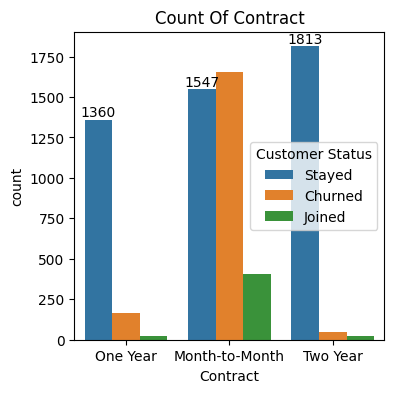

In [105]:
plt.figure(figsize=(4,4))
ax= sns.countplot(data=df_merged, x='Contract', hue= 'Customer Status')
ax.bar_label(ax.containers[0])
plt.title('Count Of Contract')
plt.show()

Customers who have moth to month are likely to churn than those who have one year or two years.

In [106]:
df_merged.columns.values

array(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Number of Referrals', 'Tenure in Months',
       'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category',
       'Churn Reason', 'Population', 'Online Backup '], dtype=object)

C:\Users\TS\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


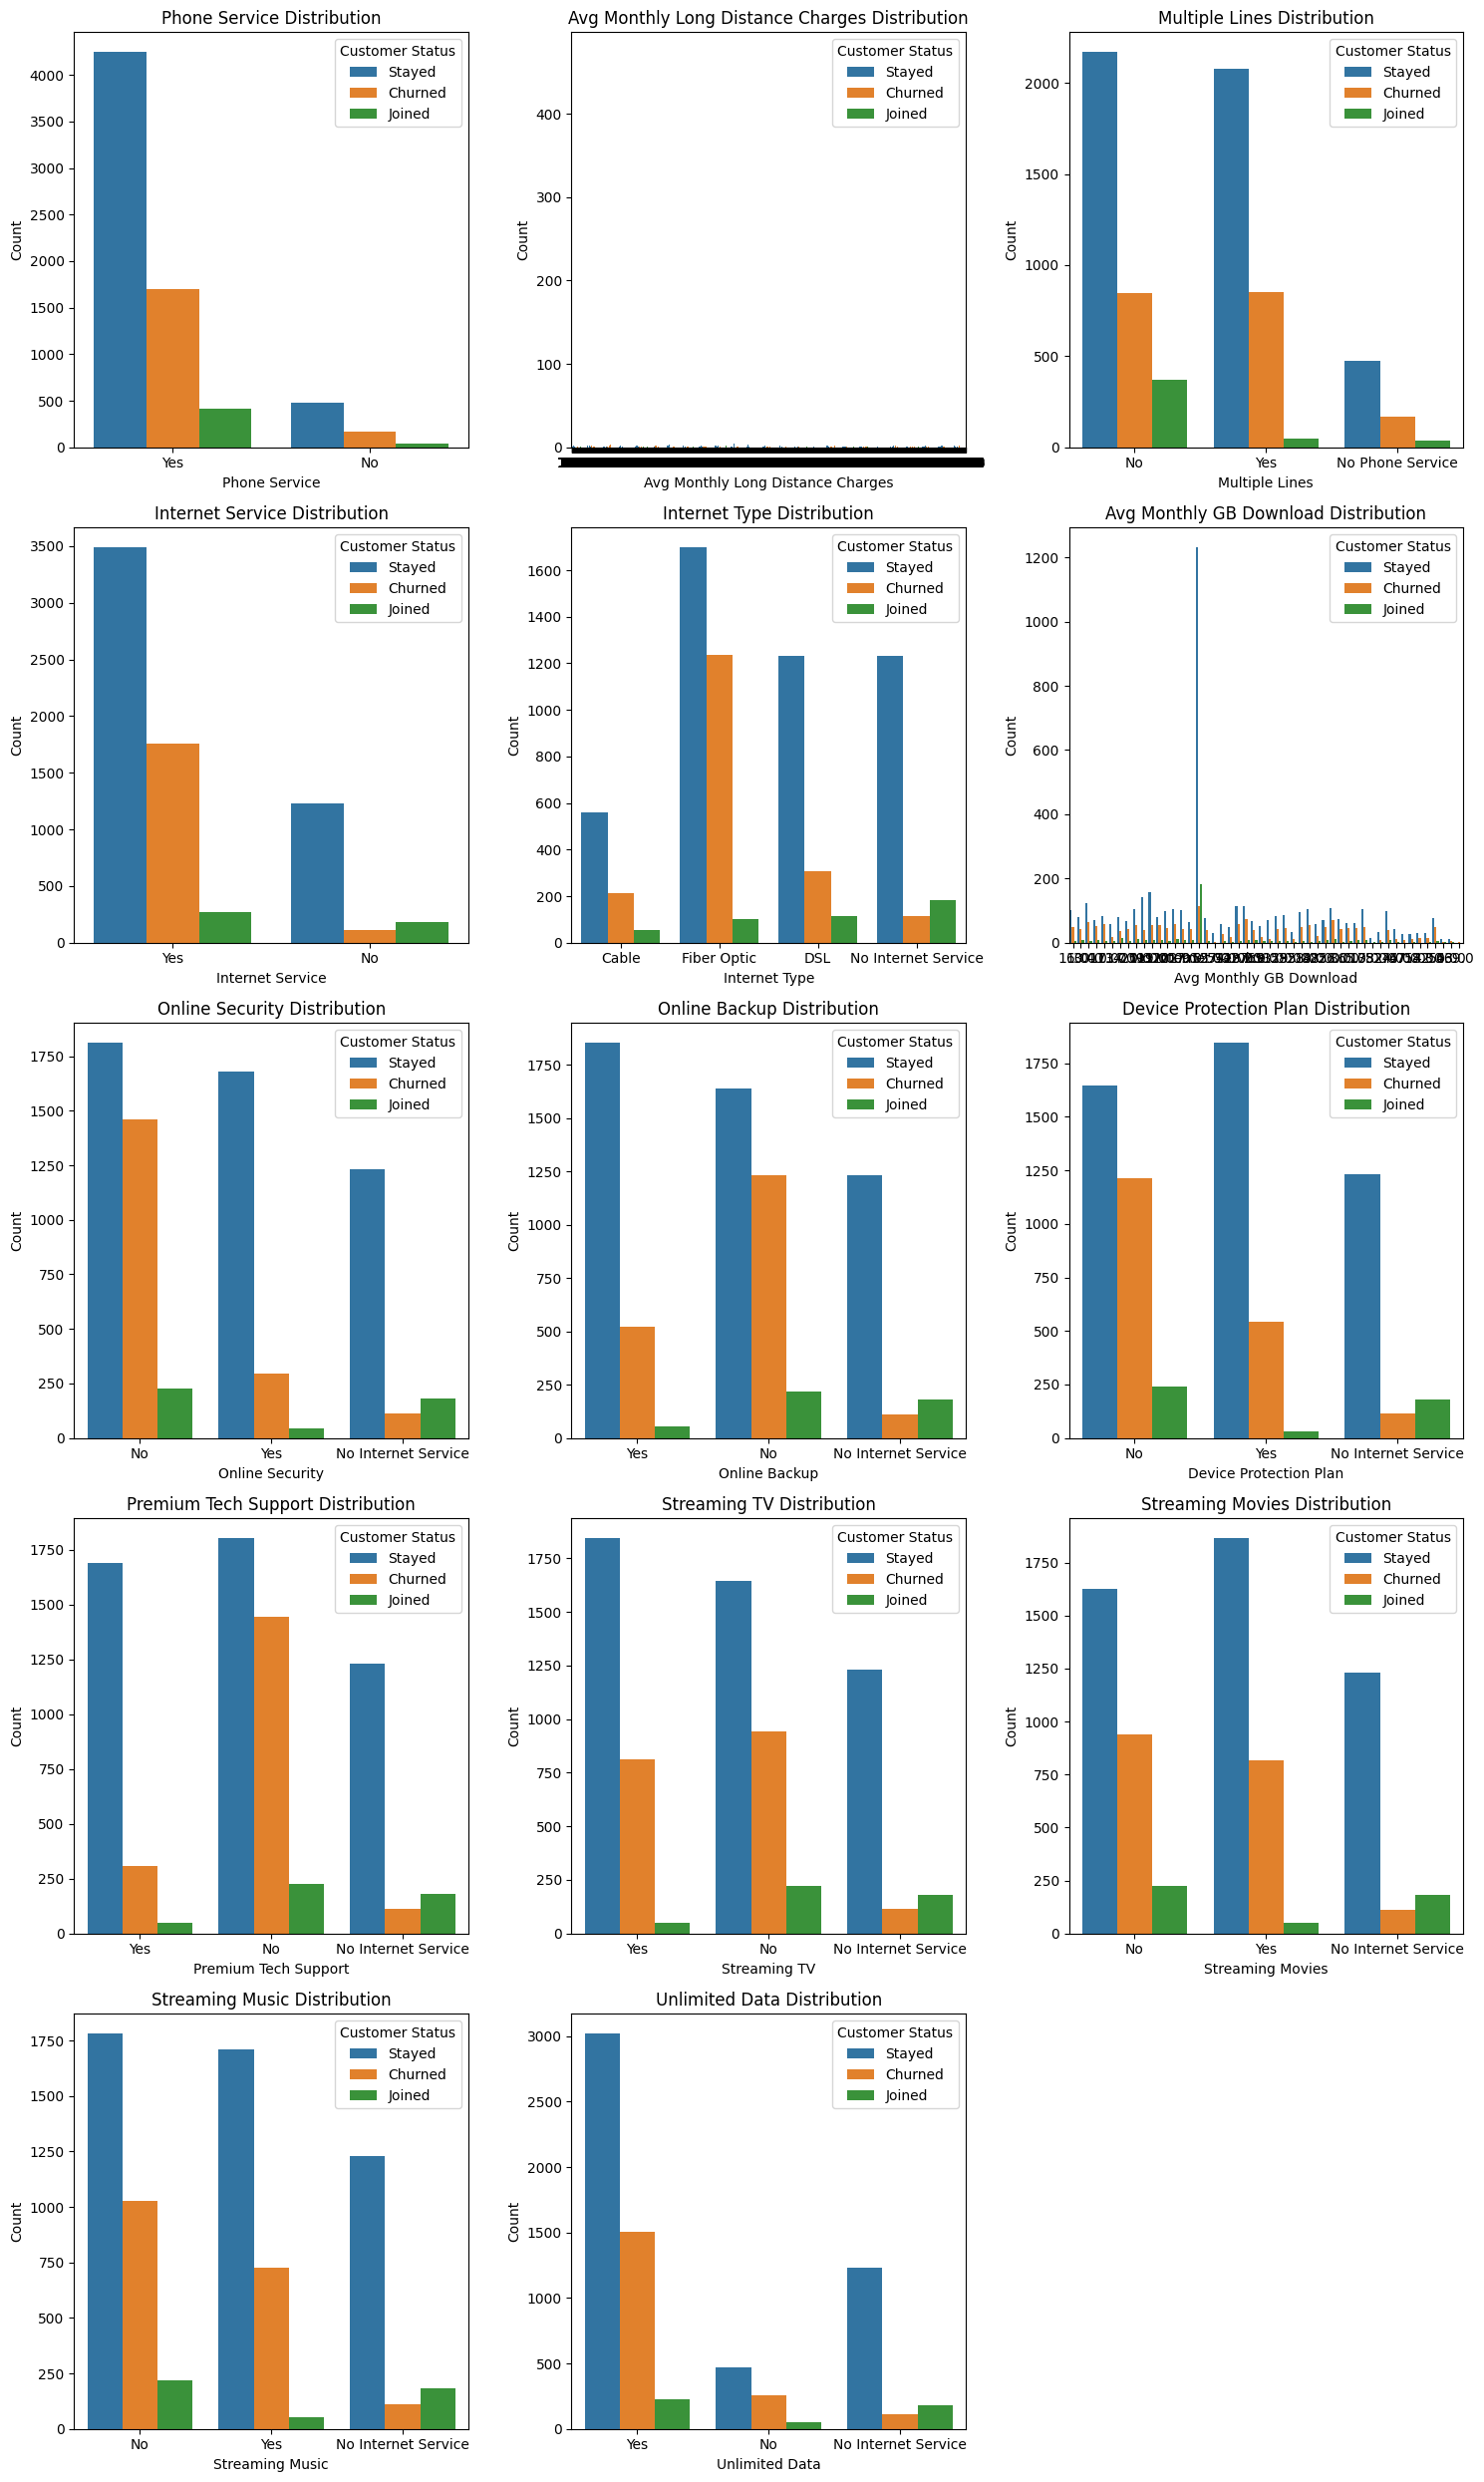

In [108]:
# List of columns for which to create the countplots
columns = ['Phone Service', 'Avg Monthly Long Distance Charges',
           'Multiple Lines', 'Internet Service', 'Internet Type',
           'Avg Monthly GB Download', 'Online Security', 'Online Backup',
           'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
           'Streaming Movies', 'Streaming Music', 'Unlimited Data']

# Set up the subplot grid
n_columns = 3  # Define how many columns you want in the grid
n_rows = (len(columns) + n_columns - 1) // n_columns  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_columns, figsize=(15, n_rows * 5))

# Flatten axes array for easier indexing
axes = axes.flatten()

# Create countplot for each column
for i, column in enumerate(columns):
    sns.countplot(data=df_merged, x=column, ax=axes[i], hue= 'Customer Status')
    axes[i].set_title(f'{column} Distribution')  # Set title for each plot
    axes[i].set_xlabel(column)  # Set the x-axis label
    axes[i].set_ylabel('Count')  # Set the y-axis label

# Remove any empty subplots (if the number of columns isn't a perfect multiple of rows)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

 The images are for multiple countplots comparing various service-related attributes (e.g., Phone Service, Internet Service, Streaming Services) across different customer statuses ("Current," "Churned," "Joined"). Generally, more customers are current for most services, with some notable churn in areas like "Phone Service" and "Internet Type." Certain variables like "Avg Monthly Long Distance Charges" and "Avg Monthly GB Download" show wide ranges but are dominated by specific customer statuses.

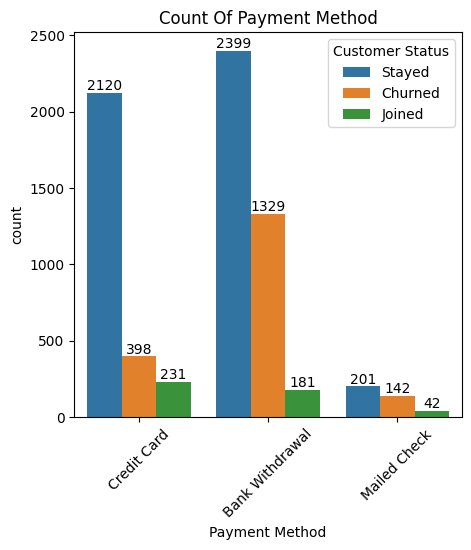

In [118]:
plt.figure(figsize=(5,5))
ax= sns.countplot(data=df_merged, x='Payment Method', hue= 'Customer Status')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.xticks(rotation=45)
plt.title('Count Of Payment Method')
plt.show()

From the above chart we see the following:
1. Stayed Customers\
   a. 2,399 customers used bank withdrawal payment method who also stayed with the operator\
   b.  2,120 customers used credit card  payment method who also stayed with the operator\
   c.  201 customers used mailed check payment  method who also stayed with the operator

2.  Churned Customers\
   a.   1,329 customers used bank withdrawal payment method who churned with the operator\
   b.   398 customers used credit card payment method who churned with the operator\
   c.   142 customers used mailed check payment method who churned with the operator

3. New Joined Customers\
   a.   181 customers used bank withdrawal payment method who joined the operator\
   b.   231 customers used credit card payment method who joined the operator\
   c.    42  customers used mailed check payment method who joined the operator







